In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
Data = pd.read_csv('house.csv')
X = Data['sqft_living']
Y = Data['price']
Data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
A = np.array(list(zip(np.ones(len(X)),X)))
A

array([[1.00e+00, 1.18e+03],
       [1.00e+00, 2.57e+03],
       [1.00e+00, 7.70e+02],
       ...,
       [1.00e+00, 1.02e+03],
       [1.00e+00, 1.60e+03],
       [1.00e+00, 1.02e+03]])

In [4]:
def J(W):
    S = 0.5*np.dot((Y-np.dot(A,W)).T,(Y-np.dot(A,W)))
    return S

In [5]:
W = np.array([-43820.60153386,    0])
N = 0.00000038  #learning rate

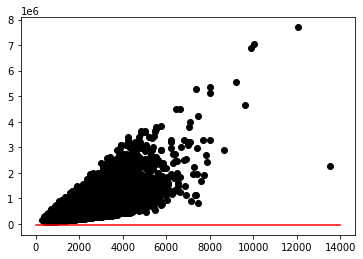

In [6]:
x = np.linspace(0,14000,100)
y = np.dot(W,np.array([np.ones(len(x)),x]))
plt.plot(x,y,'r')
plt.scatter(X,Y,color='black')

(739566495978186.8, array([-43820.49219488,    280.78773585]), 1244)

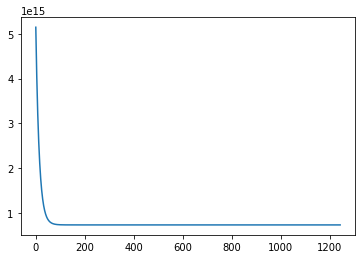

In [7]:
temp = 0
I = 0
Y1 = []
while(temp != J(W) and I<100000):
    temp = J(W)
    Y1.append(J(W))
    dJ = (1/len(A))*np.dot((np.dot(A,W)-Y).T,A)
    W = W - N*dJ
    I += 1;
plt.plot(Y1)
J(W),W,I

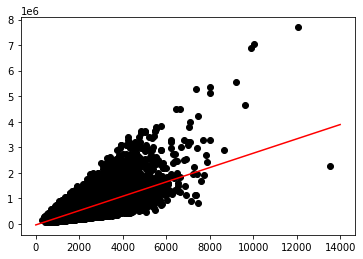

In [8]:
x = np.linspace(0,14000,100)
y = np.dot(W,np.array([np.ones(len(x)),x]))
plt.plot(x,y,'r')
plt.scatter(X,Y,color='black')

(array([-43862.58015884,    225.22252556]), 96)

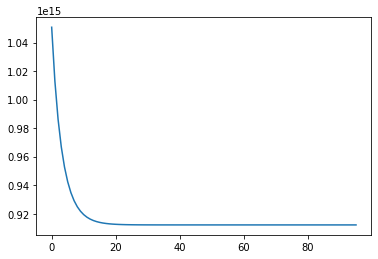

In [29]:
I = 0
L = []
temp = 0
W = np.array([-43862.60153386,    200])
N = 0.0038  #learning rate
while(abs(temp -J(W))>100 and I<1000):
    temp = J(W)
#     R = np.random.choice(np.arange(len(A)))
    W = W - N*(1/len(A))*(np.dot(W.T,A[0])-Y[0])*A[0]
    L.append(J(W))
    I += 1
plt.plot(L)
W,I

In [23]:
len(L)

1000

(array([-43862.51656694,    274.13172437]), 710)

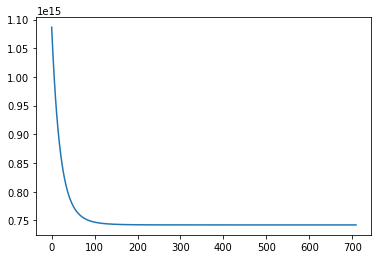

In [27]:
I = 0
L = []
temp = 0
W = np.array([-43862.60153386,    200])
N = 0.000038  #learning rate
Nt = 5
while(abs(temp -J(W))>100 and I<1000):
    temp = J(W)
    R = np.random.choice(np.arange(len(A)))
    dJ = (1/len(A))*np.dot((np.dot(A[:Nt],W)-Y[:Nt]).T,A[:Nt])
    W = W - N*dJ
    L.append(J(W))
    I += 1
plt.plot(L)
W,I

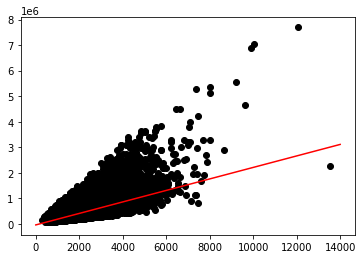

In [10]:
x = np.linspace(0,14000,100)
y = np.dot(W,np.array([np.ones(len(x)),x]))
plt.plot(x,y,'r')
plt.scatter(X,Y,color='black')